* IMPORTED THE DATASET FOR IMDB
* THE DATASET HAS TWO COLUMNS CLASS AND CLEAN_TEXT
* THE DATASET HAS 746 ROWS AND 2 COLUMNS
* IMPORTED WARNINGS TO AVIOD WARNINGS AFTER THE CODE EXECUTION

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
    
import pandas as pd
import numpy as np

df = pd.read_csv("imdb.txt")
print(df.head(5))
df.columns

   class                                         clean_text
0      0  slow moving aimless movie distressed drifting ...
1      0  not sure lost flat characters audience nearly ...
2      0  attempting artiness black white clever camera ...
3      0                        little music anything speak
4      1  best scene movie gerardo trying find song keep...


Index(['class', 'clean_text'], dtype='object')

In [2]:
df.shape

(746, 2)

In [3]:
Y = df["class"].values
X = df["clean_text"].values

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.33)
X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size=0.33)

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33) # this is random splitting
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33) # this is random splitting

print(X_train.shape,y_train.shape)
print(X_cv.shape,y_cv.shape)
print(X_test.shape,y_test.shape)

(334,) (334,)
(165,) (165,)
(247,) (247,)


* print(y_train)
* print(y_test)
* print(X_cv)
* print(y_cv)

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names())

X_train_bow = vectorizer.transform(X_train)
X_cv_bow = vectorizer.transform(X_cv)
X_test_bow = vectorizer.transform(X_test)
print(X_train_bow)
print(X_train_bow.shape,y_train.shape)
print(X_cv_bow.shape,y_cv.shape)
print(X_test_bow.shape,y_test.shape)

{'accents': 5, 'absolutely': 3, 'abysmal': 4, 'directing': 350, 'seems': 1218, 'pretentious': 1063, 'got': 603, 'bored': 138, 'watching': 1532, 'jessice': 740, 'lange': 779, 'take': 1367, 'clothes': 239, 'really': 1109, 'hope': 657, 'team': 1375, 'behind': 111, 'movie': 912, 'makes': 853, 'movies': 913, 'continue': 268, 'kinda': 766, 'weird': 1541, 'style': 1339, 'film': 507, 'deserves': 339, 'strong': 1333, 'kudos': 774, 'taking': 1370, 'stand': 1303, 'exceptional': 455, 'acting': 13, 'mostly': 905, 'lesser': 802, 'known': 770, 'cast': 184, 'super': 1351, 'intelligent': 714, 'script': 1204, 'not': 946, 'insult': 711, 'audience': 80, 'easy': 394, 'way': 1535, 'comes': 245, 'white': 1547, 'racism': 1091, 'act': 11, 'glad': 593, 'gonna': 600, 'drift': 382, 'away': 84, 'earth': 392, 'far': 487, 'possible': 1053, 'readers': 1103, 'already': 45, 'seen': 1219, 'one': 966, 'miyazaki': 895, 'films': 508, 'still': 1318, 'top': 1423, 'form': 540, 'made': 847, 'another': 60, 'worthwhile': 1572, '

In [21]:
sentance = ["abc def pqr",
            "abc pqr cdf jkl cdf"]

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(sentance)
print(vectorizer.vocabulary_)

print("="*50)
print(vectorizer.get_feature_names())
print(vectorizer.transform(sentance).toarray())

{'abc': 0, 'def': 2, 'pqr': 4, 'cdf': 1, 'jkl': 3}
['abc', 'cdf', 'def', 'jkl', 'pqr']
[[1 0 1 0 1]
 [1 2 0 1 1]]


[1.0, 0.8336583252085364, 0.8232405300978587, 0.7664752825623803, 0.7471563210919726, 0.7555519445347201, 0.7319539233741378, 0.7377676669194382]
[0.5600649350649352, 0.5441263282172374, 0.613857733175915, 0.6066263282172373, 0.6461776859504131, 0.6134149940968122, 0.632452774498229, 0.6011658795749705]


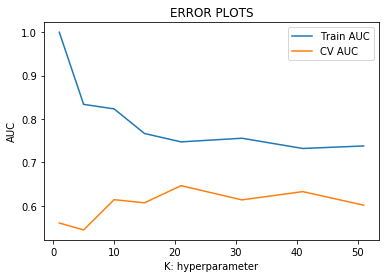

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


train_auc = []
cv_auc = []
K = [1,5,10,15,21,31,41,51]
for i in k:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_bow,y_train)
    
    y_train_pred =  neigh.predict_proba(X_train_bow)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv_bow)[:,1]
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))
#print(neigh.fit(X_train_bow,y_train))
#print(y_train_pred.shape)

print(train_auc)
print(cv_auc)

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [29]:
 L = range(10)
L[:,1]

TypeError: range indices must be integers or slices, not tuple